# An Analysis of Political Contributions During the 2020 House of Representatives Election

In this part, you will obtain as much data as you can on the campaign contributions received by each candidate. This data is avaiable through the website https://www.opensecrets.org/.

### Part 2: Exploratory Analysis

#### Regressions

In [1]:
import requests
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime as dt
import urllib3
# import re2
import regex
import re
import io
from requests.exceptions import HTTPError
from IPython.core.display import HTML
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2


In [2]:
ExcelData_df = pd.read_excel('elections_filtered_SpellChecked.xlsx')
ExcelData_df

,Candidate,Raised,Spent,DistIDCurr,IsIncumbent,IsWinner,VotePercent,IncumbentFactor,WinFactor,Raised_More,Spent_More
0,Terri Sewell (D),2168165.01,1495957.14,AL07,True,True,97.16,1,1,True,True
1,Gary Palmer (R),907218.78,909082.20,AL06,True,True,97.13,1,1,True,True
2,Kaynen Pellegrino (I),0.00,0.00,AL06,False,False,0.00,0,0,False,False
3,Mo Brooks (R),655364.80,210045.13,AL05,True,True,95.81,1,1,True,True
4,Robert B Aderholt (R),1255076.11,1323812.08,AL04,True,True,82.50,1,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...
1259,Liz Cheney (R),3003883.34,3060166.78,WY01,True,True,68.60,1,1,True,True
1260,Lynnette Grey Bull (D),134597.32,132234.75,WY01,False,False,24.60,0,0,False,False
1261,Zoilo Adalia (3),0.00,0.00,WY01,False,False,0.00,0,0,False,False
1262,Richard Brubaker (L),0.00,0.00,WY01,False,False,0.00,0,0,False,False


In [3]:
Spent_logreg = smf.logit("WinFactor ~ Spent",
                                data = ExcelData_df).fit()

Optimization terminated successfully.
         Current function value: 0.551291
         Iterations 6


In [4]:
Spent_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              WinFactor   No. Observations:                 1264
Model:                          Logit   Df Residuals:                     1262
Method:                           MLE   Df Model:                            1
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.1423
Time:                        20:44:54   Log-Likelihood:                -696.83
converged:                       True   LL-Null:                       -812.40
Covariance Type:            nonrobust   LLR p-value:                 3.372e-52
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3212      0.082    -16.157      0.000      -1.481      -1.161
Spent       6.029e-07   5.02e-08     12.005      0.000    5.04e-07    7.01e-07
==============================================================================
"""

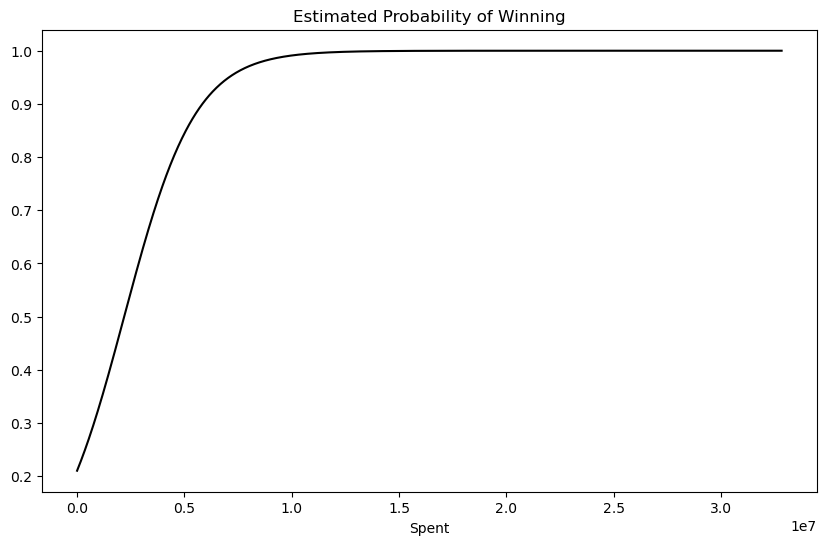

In [5]:
fit_df = pd.DataFrame({
    'Spent': np.linspace(start = ExcelData_df['Spent'].min(),
                            stop = ExcelData_df['Spent'].max(),
                            num = 1264)
})

fit_df['fit'] = Spent_logreg.predict(fit_df)

fit_df.plot(x = 'Spent',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Estimated Probability of Winning');

In [ ]:
Spent_summary = (
    ExcelData_df
    .assign(group = pd.qcut(ExcelData_df['Spent'], 
                            q = 60, 
                            duplicates = 'drop'))
    .groupby('group')   #('group', observed=False)
    [['WinFactor', 'Spent']]
    .mean()
    .reset_index()
    .rename(columns = {'WinFactor': 'eprob'})
)

Spent_summary

,group,eprob,Spent
0,"(-4965.081, 0.0]",0.000000,-1.313513e+01
1,"(0.0, 11.8]",0.000000,1.000000e+01
2,"(11.8, 1246.169]",0.000000,5.110738e+02
3,"(1246.169, 5047.85]",0.000000,2.549603e+03
4,"(5047.85, 9665.818]",0.000000,6.866986e+03
5,"(9665.818, 14724.974]",0.000000,1.214007e+04
6,"(14724.974, 23176.639]",0.000000,1.906122e+04
7,"(23176.639, 32999.472]",0.000000,2.714882e+04
8,"(32999.472, 42374.69]",0.000000,3.767166e+04
9,"(42374.69, 59915.483]",0.000000,5.039622e+04


In [7]:
Spent_summary['fit_prob'] = Spent_logreg.predict(Spent_summary[['Spent']])
Spent_summary

,group,eprob,Spent,fit_prob
0,"(-4965.081, 0.0]",0.000000,-1.313513e+01,0.210619
1,"(0.0, 11.8]",0.000000,1.000000e+01,0.210621
2,"(11.8, 1246.169]",0.000000,5.110738e+02,0.210672
3,"(1246.169, 5047.85]",0.000000,2.549603e+03,0.210876
4,"(5047.85, 9665.818]",0.000000,6.866986e+03,0.211309
5,"(9665.818, 14724.974]",0.000000,1.214007e+04,0.211840
6,"(14724.974, 23176.639]",0.000000,1.906122e+04,0.212537
7,"(23176.639, 32999.472]",0.000000,2.714882e+04,0.213354
8,"(32999.472, 42374.69]",0.000000,3.767166e+04,0.214421
9,"(42374.69, 59915.483]",0.000000,5.039622e+04,0.215716


Side Note on .predict() function: https://www.askpython.com/python/examples/python-predict-function

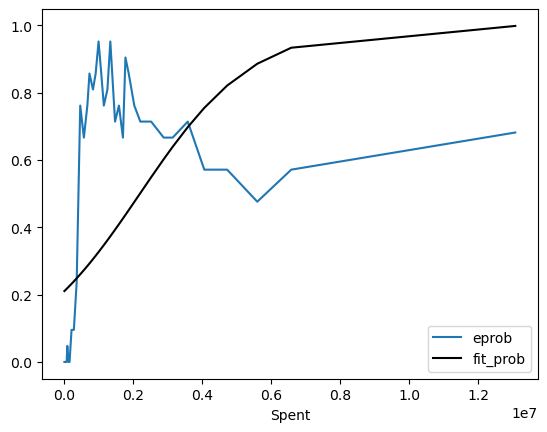

In [8]:
ax = Spent_summary.plot(x = 'Spent', y = 'eprob')
Spent_summary.plot(x = 'Spent', y = 'fit_prob',
                color = 'black',
                ax = ax);

In [9]:
Spent_summary['elogit'] = np.log(Spent_summary['eprob'] / (1 - Spent_summary['eprob']))
Spent_summary['fit_logit'] = np.log(Spent_summary['fit_prob'] / (1 - Spent_summary['fit_prob']))
Spent_summary

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,group,eprob,Spent,fit_prob,elogit,fit_logit
0,"(-4965.081, 0.0]",0.000000,-1.313513e+01,0.210619,-inf,-1.321199
1,"(0.0, 11.8]",0.000000,1.000000e+01,0.210621,-inf,-1.321185
2,"(11.8, 1246.169]",0.000000,5.110738e+02,0.210672,-inf,-1.320883
3,"(1246.169, 5047.85]",0.000000,2.549603e+03,0.210876,-inf,-1.319654
4,"(5047.85, 9665.818]",0.000000,6.866986e+03,0.211309,-inf,-1.317051
5,"(9665.818, 14724.974]",0.000000,1.214007e+04,0.211840,-inf,-1.313872
6,"(14724.974, 23176.639]",0.000000,1.906122e+04,0.212537,-inf,-1.309699
7,"(23176.639, 32999.472]",0.000000,2.714882e+04,0.213354,-inf,-1.304823
8,"(32999.472, 42374.69]",0.000000,3.767166e+04,0.214421,-inf,-1.298479
9,"(42374.69, 59915.483]",0.000000,5.039622e+04,0.215716,-inf,-1.290808


### Normalize money spent against one's opponents in one's district, using the Transform Method: aggregation within a group. i.e. One's campaign expenditure in proportion to one's district's total campaign expenditure. 

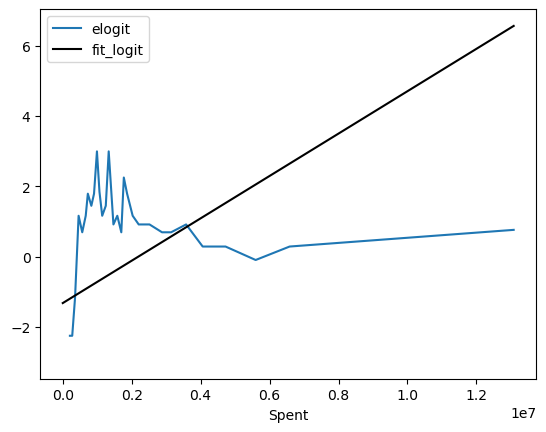

In [10]:
ax = Spent_summary.plot(x = 'Spent', y = 'elogit')
Spent_summary.plot(x = 'Spent', y = 'fit_logit',
                color = 'black',
                ax = ax);

In [11]:
ExcelData_df['WinFactor'].value_counts(normalize = True)

WinFactor
0    0.657437
1    0.342563
Name: proportion, dtype: float64

In [12]:
var = 'IncumbentFactor'

pd.crosstab(ExcelData_df[var],
            ExcelData_df['WinFactor'],
            normalize = 'index')

WinFactor,0,1
IncumbentFactor,,
0,0.931663,0.068337
1,0.033679,0.966321


In [13]:
reduced_model = smf.logit('WinFactor ~ IncumbentFactor',
                        data = ExcelData_df).fit()
full_model = smf.logit('WinFactor ~ IncumbentFactor + Spent',
                    data = ExcelData_df).fit()

Optimization terminated successfully.
         Current function value: 0.218164
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.210187
         Iterations 7


In [14]:
G2 = -2 * (reduced_model.llf - full_model.llf)
G2

20.167398103390724

In [15]:
from scipy.stats import chi2

In [16]:
df = full_model.df_model - reduced_model.df_model
df

1.0

In [17]:
p = chi2.sf(G2, df = df)
p

7.095194702408807e-06

In [18]:
def dd_test(reduced_model, full_model):
    G2 = -2 * (reduced_model.llf - full_model.llf)
    df = full_model.df_model - reduced_model.df_model
    return chi2.sf(G2, df = df)

In [19]:
dd_test(reduced_model, full_model)

7.095194702408807e-06

### With normalization & aggregation via Transformation Method

In [20]:
ExcelData_df.groupby('DistIDCurr')['Spent'].sum()

DistIDCurr
AK01    6878551.53
AL01    1938322.15
AL02     725355.77
AL03    1259534.85
AL04    1323812.08
           ...    
WI08    3241716.65
WV01    1167744.58
WV02    1505568.30
WV03     824771.58
WY01    3192401.53
Name: Spent, Length: 435, dtype: float64

In [21]:
ExcelData_df['Total_District_Spent'] = ExcelData_df.groupby('DistIDCurr')['Spent'].transform('sum')
ExcelData_df

,Candidate,Raised,Spent,DistIDCurr,IsIncumbent,IsWinner,VotePercent,IncumbentFactor,WinFactor,Raised_More,Spent_More,Total_District_Spent
0,Terri Sewell (D),2168165.01,1495957.14,AL07,True,True,97.16,1,1,True,True,1495957.14
1,Gary Palmer (R),907218.78,909082.20,AL06,True,True,97.13,1,1,True,True,909082.20
2,Kaynen Pellegrino (I),0.00,0.00,AL06,False,False,0.00,0,0,False,False,909082.20
3,Mo Brooks (R),655364.80,210045.13,AL05,True,True,95.81,1,1,True,True,210045.13
4,Robert B Aderholt (R),1255076.11,1323812.08,AL04,True,True,82.50,1,1,True,True,1323812.08
...,...,...,...,...,...,...,...,...,...,...,...,...
1259,Liz Cheney (R),3003883.34,3060166.78,WY01,True,True,68.60,1,1,True,True,3192401.53
1260,Lynnette Grey Bull (D),134597.32,132234.75,WY01,False,False,24.60,0,0,False,False,3192401.53
1261,Zoilo Adalia (3),0.00,0.00,WY01,False,False,0.00,0,0,False,False,3192401.53
1262,Richard Brubaker (L),0.00,0.00,WY01,False,False,0.00,0,0,False,False,3192401.53


In [22]:
ExcelData_df.groupby('DistIDCurr')['Raised'].sum()

DistIDCurr
AK01    7101353.21
AL01    2051416.45
AL02     706856.43
AL03    1243384.63
AL04    1255076.11
           ...    
WI08    3619883.19
WV01    1173641.03
WV02    2797544.74
WV03     973631.64
WY01    3138480.66
Name: Raised, Length: 435, dtype: float64

In [23]:
ExcelData_df['Total_District_Raised'] = ExcelData_df.groupby('DistIDCurr')['Raised'].transform('sum')
ExcelData_df

,Candidate,Raised,Spent,DistIDCurr,IsIncumbent,IsWinner,VotePercent,IncumbentFactor,WinFactor,Raised_More,Spent_More,Total_District_Spent,Total_District_Raised
0,Terri Sewell (D),2168165.01,1495957.14,AL07,True,True,97.16,1,1,True,True,1495957.14,2168165.01
1,Gary Palmer (R),907218.78,909082.20,AL06,True,True,97.13,1,1,True,True,909082.20,907218.78
2,Kaynen Pellegrino (I),0.00,0.00,AL06,False,False,0.00,0,0,False,False,909082.20,907218.78
3,Mo Brooks (R),655364.80,210045.13,AL05,True,True,95.81,1,1,True,True,210045.13,655364.80
4,Robert B Aderholt (R),1255076.11,1323812.08,AL04,True,True,82.50,1,1,True,True,1323812.08,1255076.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,Liz Cheney (R),3003883.34,3060166.78,WY01,True,True,68.60,1,1,True,True,3192401.53,3138480.66
1260,Lynnette Grey Bull (D),134597.32,132234.75,WY01,False,False,24.60,0,0,False,False,3192401.53,3138480.66
1261,Zoilo Adalia (3),0.00,0.00,WY01,False,False,0.00,0,0,False,False,3192401.53,3138480.66
1262,Richard Brubaker (L),0.00,0.00,WY01,False,False,0.00,0,0,False,False,3192401.53,3138480.66


In [24]:
ExcelData_df['Prop_Total_District_Raised'] = ExcelData_df['Raised'] / ExcelData_df['Total_District_Raised']
ExcelData_df

,Candidate,Raised,Spent,DistIDCurr,IsIncumbent,IsWinner,VotePercent,IncumbentFactor,WinFactor,Raised_More,Spent_More,Total_District_Spent,Total_District_Raised,Prop_Total_District_Raised
0,Terri Sewell (D),2168165.01,1495957.14,AL07,True,True,97.16,1,1,True,True,1495957.14,2168165.01,1.000000
1,Gary Palmer (R),907218.78,909082.20,AL06,True,True,97.13,1,1,True,True,909082.20,907218.78,1.000000
2,Kaynen Pellegrino (I),0.00,0.00,AL06,False,False,0.00,0,0,False,False,909082.20,907218.78,0.000000
3,Mo Brooks (R),655364.80,210045.13,AL05,True,True,95.81,1,1,True,True,210045.13,655364.80,1.000000
4,Robert B Aderholt (R),1255076.11,1323812.08,AL04,True,True,82.50,1,1,True,True,1323812.08,1255076.11,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,Liz Cheney (R),3003883.34,3060166.78,WY01,True,True,68.60,1,1,True,True,3192401.53,3138480.66,0.957114
1260,Lynnette Grey Bull (D),134597.32,132234.75,WY01,False,False,24.60,0,0,False,False,3192401.53,3138480.66,0.042886
1261,Zoilo Adalia (3),0.00,0.00,WY01,False,False,0.00,0,0,False,False,3192401.53,3138480.66,0.000000
1262,Richard Brubaker (L),0.00,0.00,WY01,False,False,0.00,0,0,False,False,3192401.53,3138480.66,0.000000


In [25]:
ExcelData_df['Prop_Total_District_Spent'] = ExcelData_df['Spent'] / ExcelData_df['Total_District_Spent']
ExcelData_df

,Candidate,Raised,Spent,DistIDCurr,IsIncumbent,IsWinner,VotePercent,IncumbentFactor,WinFactor,Raised_More,Spent_More,Total_District_Spent,Total_District_Raised,Prop_Total_District_Raised,Prop_Total_District_Spent
0,Terri Sewell (D),2168165.01,1495957.14,AL07,True,True,97.16,1,1,True,True,1495957.14,2168165.01,1.000000,1.000000
1,Gary Palmer (R),907218.78,909082.20,AL06,True,True,97.13,1,1,True,True,909082.20,907218.78,1.000000,1.000000
2,Kaynen Pellegrino (I),0.00,0.00,AL06,False,False,0.00,0,0,False,False,909082.20,907218.78,0.000000,0.000000
3,Mo Brooks (R),655364.80,210045.13,AL05,True,True,95.81,1,1,True,True,210045.13,655364.80,1.000000,1.000000
4,Robert B Aderholt (R),1255076.11,1323812.08,AL04,True,True,82.50,1,1,True,True,1323812.08,1255076.11,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,Liz Cheney (R),3003883.34,3060166.78,WY01,True,True,68.60,1,1,True,True,3192401.53,3138480.66,0.957114,0.958578
1260,Lynnette Grey Bull (D),134597.32,132234.75,WY01,False,False,24.60,0,0,False,False,3192401.53,3138480.66,0.042886,0.041422
1261,Zoilo Adalia (3),0.00,0.00,WY01,False,False,0.00,0,0,False,False,3192401.53,3138480.66,0.000000,0.000000
1262,Richard Brubaker (L),0.00,0.00,WY01,False,False,0.00,0,0,False,False,3192401.53,3138480.66,0.000000,0.000000


In [26]:
reduced_model_2 = smf.logit('WinFactor ~ IncumbentFactor',
                        data = ExcelData_df).fit()
full_model_2 = smf.logit('WinFactor ~ IncumbentFactor + Prop_Total_District_Spent',
                    data = ExcelData_df).fit()

Optimization terminated successfully.
         Current function value: 0.218164
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.126426
         Iterations 8


In [27]:
G2_2nd = -2 * (reduced_model_2.llf - full_model_2.llf)
G2_2nd

231.9140445481827

In [28]:
df_2 = full_model_2.df_model - reduced_model_2.df_model
df_2

1.0

In [29]:
p_2nd = chi2.sf(G2_2nd, df = df_2)
p_2nd

2.2799679516162025e-52

In [30]:
def dd_test(reduced_model, full_model):
    G2 = -2 * (reduced_model.llf - full_model.llf)
    df = full_model.df_model - reduced_model.df_model
    return chi2.sf(G2, df = df)

In [31]:
dd_test(reduced_model_2, full_model_2)

2.2799679516162025e-52

In [32]:
full_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              WinFactor   No. Observations:                 1264
Model:                          Logit   Df Residuals:                     1261
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.8033
Time:                        20:44:57   Log-Likelihood:                -159.80
converged:                       True   LL-Null:                       -812.40
Covariance Type:            nonrobust   LLR p-value:                3.809e-284
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.7949      0.317    -15.116      0.000      -5.417      -4.173
IncumbentFactor               3.3543      0.360      9.318      0.000       2.649       4.060
Prop_Total_District_Spent     6.9144      0.583     11.852      0.000       5.771       8.058
=============================================================================================
"""

### Prediction Model on Spending for Each Winning Candidate as Proportion of Total Spending in One's District

In [33]:
fit_df_2 = pd.DataFrame({
    'IncumbentFactor': 0, 'Prop_Total_District_Spent': np.linspace(start = ExcelData_df['Prop_Total_District_Spent'].min(),
                            stop = ExcelData_df['Prop_Total_District_Spent'].max(),
                            num = 1264)
})
fit_df_2.head()

,IncumbentFactor,Prop_Total_District_Spent
0,0,-0.003921
1,0,-0.003126
2,0,-0.002331
3,0,-0.001536
4,0,-0.000741


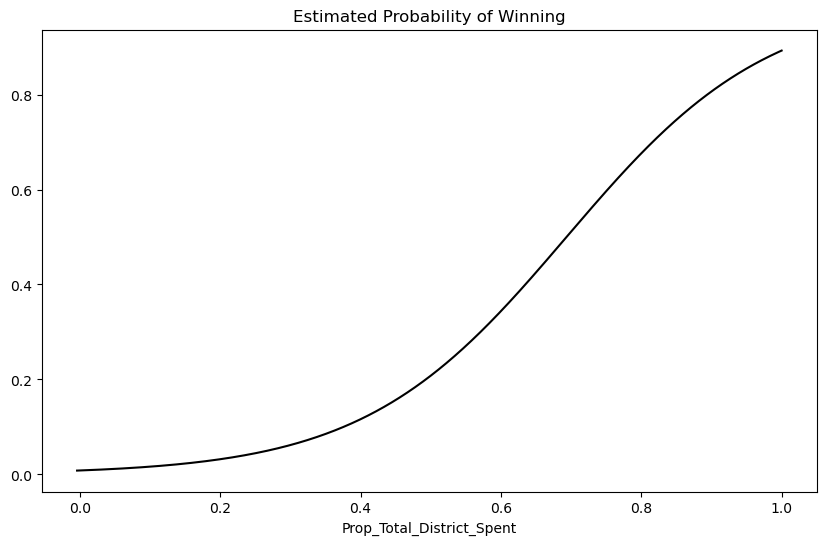

In [34]:
fit_df_2 = pd.DataFrame({
    'IncumbentFactor':0, 'Prop_Total_District_Spent': np.linspace(start = ExcelData_df['Prop_Total_District_Spent'].min(),
                            stop = ExcelData_df['Prop_Total_District_Spent'].max(),
                            num = 1264)
})

fit_df_2['fit'] = full_model_2.predict(fit_df_2)

fit_df_2.plot(x = 'Prop_Total_District_Spent',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Estimated Probability of Winning');

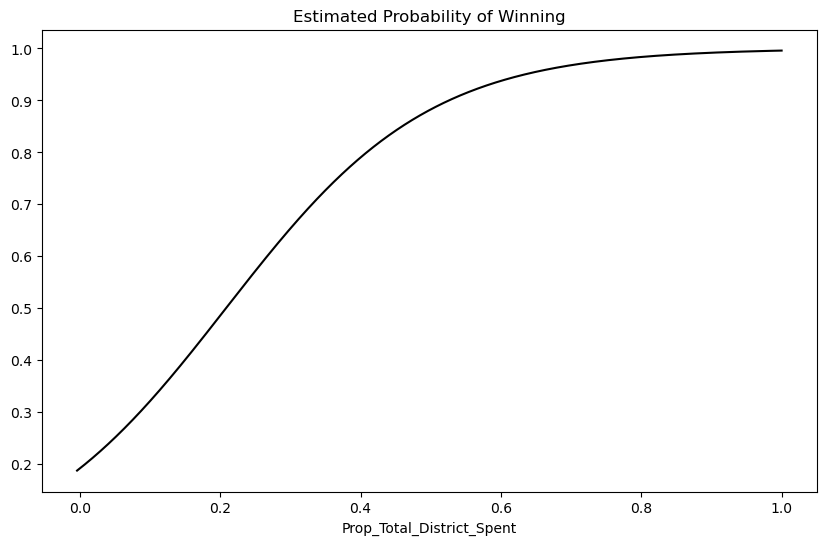

In [35]:
fit_df_3 = pd.DataFrame({
    'IncumbentFactor':1, 'Prop_Total_District_Spent': np.linspace(start = ExcelData_df['Prop_Total_District_Spent'].min(),
                            stop = ExcelData_df['Prop_Total_District_Spent'].max(),
                            num = 1264)
})

fit_df_3['fit'] = full_model_2.predict(fit_df_3)

fit_df_3.plot(x = 'Prop_Total_District_Spent',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Estimated Probability of Winning');

In [36]:
Spent_Prop_summary = (
    ExcelData_df
    .assign(group = pd.qcut(ExcelData_df['Prop_Total_District_Spent'], 
                            q = 5, 
                            duplicates = 'drop'))
    .groupby(['group', 'IncumbentFactor'])
    [['WinFactor', 'Prop_Total_District_Spent']]
    .mean()
    .reset_index()
    .rename(columns = {'WinFactor': 'eprob'})
)

Spent_Prop_summary.head(50)

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_9977/743181455.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['group', 'IncumbentFactor'])


,group,IncumbentFactor,eprob,Prop_Total_District_Spent
0,"(-0.00492, 0.0]",0,0.000000,-0.000010
1,"(-0.00492, 0.0]",1,NaN,NaN
2,"(0.0, 0.0247]",0,0.000000,0.007522
3,"(0.0, 0.0247]",1,NaN,NaN
4,"(0.0247, 0.36]",0,0.044898,0.150424
5,"(0.0247, 0.36]",1,1.000000,0.268191
6,"(0.36, 0.841]",0,0.240000,0.517702
7,"(0.36, 0.841]",1,0.915033,0.657657
8,"(0.841, 1.0]",0,0.925926,0.956553
9,"(0.841, 1.0]",1,1.000000,0.960580


In [37]:
Spent_Prop_summary['Predicted_Chance_of_Winning'] = full_model_2.predict(Spent_Prop_summary)
Spent_Prop_summary 
# Predicted_Chance_of_Winning is straight probability of winning, NOT Log Odds

,group,IncumbentFactor,eprob,Prop_Total_District_Spent,Predicted_Chance_of_Winning
0,"(-0.00492, 0.0]",0,0.000000,-0.000010,0.008203
1,"(-0.00492, 0.0]",1,NaN,NaN,NaN
2,"(0.0, 0.0247]",0,0.000000,0.007522,0.008638
3,"(0.0, 0.0247]",1,NaN,NaN,NaN
4,"(0.0247, 0.36]",0,0.044898,0.150424,0.022869
5,"(0.0247, 0.36]",1,1.000000,0.268191,0.601977
6,"(0.36, 0.841]",0,0.240000,0.517702,0.228755
7,"(0.36, 0.841]",1,0.915033,0.657657,0.957165
8,"(0.841, 1.0]",0,0.925926,0.956553,0.860449
9,"(0.841, 1.0]",1,1.000000,0.960580,0.994520


In [38]:
full_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              WinFactor   No. Observations:                 1264
Model:                          Logit   Df Residuals:                     1261
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.8033
Time:                        20:44:57   Log-Likelihood:                -159.80
converged:                       True   LL-Null:                       -812.40
Covariance Type:            nonrobust   LLR p-value:                3.809e-284
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.7949      0.317    -15.116      0.000      -5.417      -4.173
IncumbentFactor               3.3543      0.360      9.318      0.000       2.649       4.060
Prop_Total_District_Spent     6.9144      0.583     11.852      0.000       5.771       8.058
=============================================================================================
"""

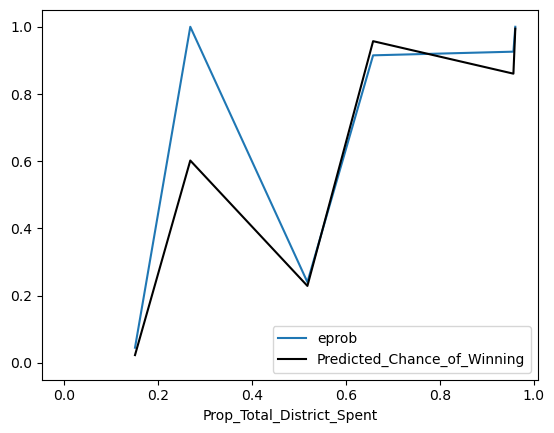

In [39]:
ax_2 = Spent_Prop_summary.plot(x = 'Prop_Total_District_Spent', y = 'eprob')
Spent_Prop_summary.plot(x = 'Prop_Total_District_Spent', y = 'Predicted_Chance_of_Winning',
                color = 'black',
                ax = ax_2);

In [40]:
Spent_Prop_summary['elogit'] = np.log(Spent_Prop_summary['eprob'] / (1 - Spent_Prop_summary['eprob']))
Spent_Prop_summary['fit_logit'] = np.log(Spent_Prop_summary['Predicted_Chance_of_Winning'] / (1 - Spent_Prop_summary['Predicted_Chance_of_Winning']))
Spent_Prop_summary

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,group,IncumbentFactor,eprob,Prop_Total_District_Spent,Predicted_Chance_of_Winning,elogit,fit_logit
0,"(-0.00492, 0.0]",0,0.000000,-0.000010,0.008203,-inf,-4.795006
1,"(-0.00492, 0.0]",1,NaN,NaN,NaN,NaN,NaN
2,"(0.0, 0.0247]",0,0.000000,0.007522,0.008638,-inf,-4.742927
3,"(0.0, 0.0247]",1,NaN,NaN,NaN,NaN,NaN
4,"(0.0247, 0.36]",0,0.044898,0.150424,0.022869,-3.057426,-3.754844
5,"(0.0247, 0.36]",1,1.000000,0.268191,0.601977,inf,0.413710
6,"(0.36, 0.841]",0,0.240000,0.517702,0.228755,-1.152680,-1.215352
7,"(0.36, 0.841]",1,0.915033,0.657657,0.957165,2.376693,3.106628
8,"(0.841, 1.0]",0,0.925926,0.956553,0.860449,2.525729,1.819025
9,"(0.841, 1.0]",1,1.000000,0.960580,0.994520,inf,5.201150
